<a href="https://colab.research.google.com/github/malvikaRavichandran/Data_Analysis_Projects/blob/main/IBM_Predicting_HR_Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os
import plotly.express as px
from scipy import stats

Mounted at /content/drive/


In [3]:
data_path = "drive/My Drive/Colab Notebooks/652_Project/HR-Employee-Attrition.csv"
df = pd.read_csv(data_path)

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
df.isnull().any().any()

False

No missing value observed

# **1) Statistics for numerical variables**

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24d26621f0>,
      dtype=object)

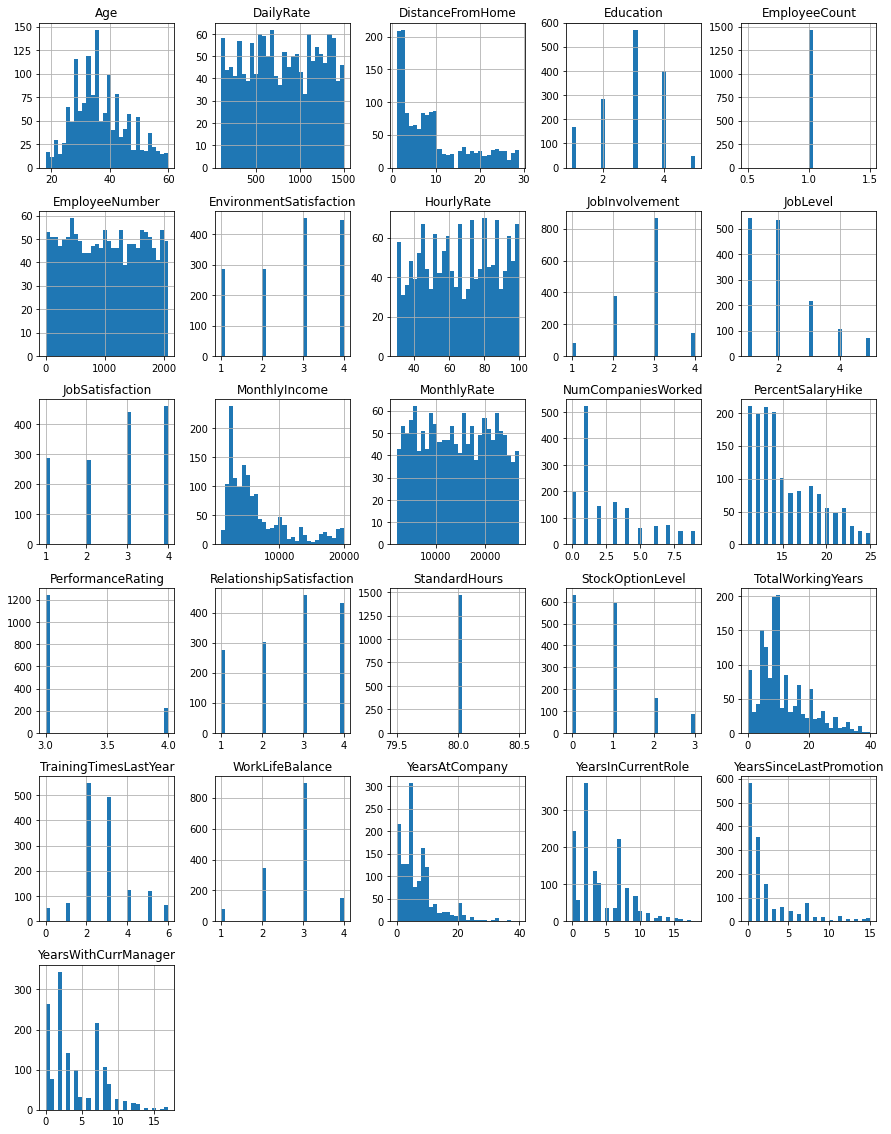

In [8]:
df.hist(bins=30, figsize=(15, 20))

In [9]:
for col in ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike']:
 result=stats.shapiro(df[col])
 print('Shapiro test statistics for {0} = {1} and P value = {2}'.format(col,result[0],result[1]))

Shapiro test statistics for Age = 0.9774479269981384 and P value = 2.0348782405724304e-14
Shapiro test statistics for DailyRate = 0.9543983936309814 and P value = 5.33020646444966e-21
Shapiro test statistics for DistanceFromHome = 0.8615931868553162 and P value = 4.085665715153025e-34
Shapiro test statistics for HourlyRate = 0.9550295472145081 and P value = 7.414142614934963e-21
Shapiro test statistics for MonthlyIncome = 0.8279080390930176 and P value = 4.403282003619775e-37
Shapiro test statistics for MonthlyRate = 0.9544640779495239 and P value = 5.515456551467108e-21
Shapiro test statistics for PercentSalaryHike = 0.9006035923957825 and P value = 7.476110216992445e-30


We observed many skewned histogram, and through the Shapiro test, we could confirm that the none of the above variables is normally distributed
(p<0.05).

# **2) Statistics for catergorical variables**

In [10]:
cat_cols=df.select_dtypes(include=object).columns.tolist()
cat_df=pd.DataFrame(df[cat_cols].melt(var_name='column', value_name='value')
 .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
display(df.select_dtypes(include=object).describe())
display(cat_df)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


count
column         value                           
Attrition      Yes                          237
               No                          1233
BusinessTravel Non-Travel                   150
               Travel_Frequently            277
               Travel_Rarely               1043
Department     Human Resources               63
               Sales                        446
               Research & Development       961
EducationField Human Resources               27
               Other                         82
               Technical Degree             132
               Marketing                    159
               Medical                      464
               Life Sciences                606
Gender         Female                       588
               Male                         882
JobRole        Human Resources               52
               Research Director             80
               Sales Representative          83
               Manager                      102
               Healthcare Representative    131
               Manufacturing Director       145
               Laboratory Technician        259
               Research Scientist           292
               Sales Executive              326
MaritalStatus  Divorced                     327
               Single                       470
               Married                      673
Over18         Y                           1470
OverTime       Yes                          416
               No                          1054

Meaningless variables: "EmployeeCount","EmployeeNumber", "StandardHours", "Over18"

# **3) EDA & Visualization**

**Attrition Rate**

([<matplotlib.patches.Wedge at 0x7f24d1690970>,
 [Text(-1.4428375098266477, 0.800449823684932, 'No'),
  Text(1.4428375098266475, -0.8004498236849322, 'Yes')],
 [Text(-0.7870022780872623, 0.4366089947372356, '84%'),
  Text(0.7870022780872622, -0.4366089947372357, '16%')])

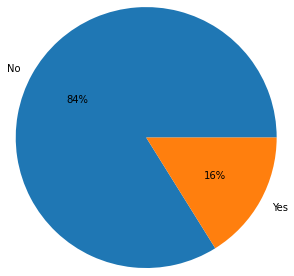

In [11]:
ratio_att = df.groupby('Attrition')['Attrition'].count()
plt.pie(ratio_att,labels=['No','Yes'], radius=1.5, autopct='%.0f%%')

We find only 16% attrition rate of employees. This is an inbalanced dataset.

**Attrition & gender**

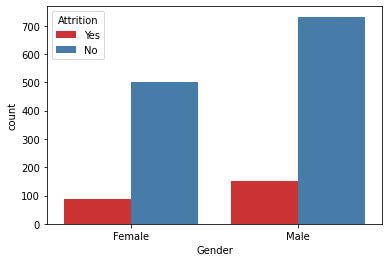

In [12]:
sns.countplot(x='Gender', hue='Attrition', palette = "Set1", data=df)

**Attrition & work-life balance**

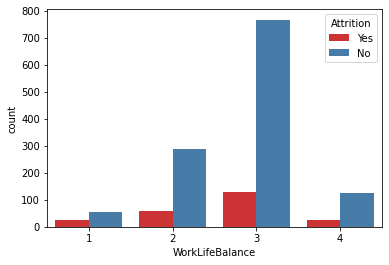

In [13]:
sns.countplot(x='WorkLifeBalance', hue='Attrition', palette = "Set1", data=df)

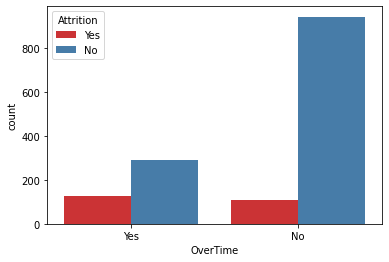

In [14]:
sns.countplot(x='OverTime', hue='Attrition', palette = "Set1", data=df)

**Attrition & job satisfaction**

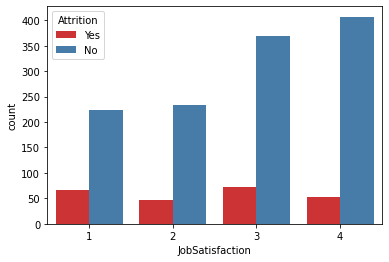

In [15]:
sns.countplot(x='JobSatisfaction', hue='Attrition', palette = "Set1", data=df)

**Attrition & monthly income**

In [16]:
mi_att=df.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
mi_att['MonthlyIncome']=round(mi_att['MonthlyIncome'],-3)
mi_att=mi_att.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
fig=px.line(mi_att,x='MonthlyIncome',y='Counts',color='Attrition',title='Attrition & Monthly Income')
fig.show()

**Attrition & monthly rate**

In [17]:
mrate_att=df.groupby(['MonthlyRate','Attrition']).apply(lambda x:x['MonthlyRate'].count()).reset_index(name='Counts')
mrate_att['MonthlyRate']=round(mrate_att['MonthlyRate'],-3)
mrate_att=mrate_att.groupby(['MonthlyRate','Attrition']).apply(lambda x:x['MonthlyRate'].count()).reset_index(name='Counts')
fig=px.line(mrate_att,x='MonthlyRate',y='Counts',color='Attrition',title='Attrition & Monthly Rate')
fig.show()

**Attrition & salary hike**

In [18]:
hike_attrition = df.groupby(['PercentSalaryHike','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(hike_attrition, x='PercentSalaryHike',y='Counts',color='Attrition',title='Attrition & Salary Hike')

**Attrition & age**

In [19]:
age_attrition = df.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(age_attrition, x='Age',y='Counts',color='Attrition',title='Attrition & Age')

**Attrition & work experience**

In [20]:
numcompaniesworked_attrition = df.groupby(['NumCompaniesWorked','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(numcompaniesworked_attrition,x='NumCompaniesWorked',y='Counts',color='Attrition',title='Attrition & Work Experience')

# **4) Correlation heatmap**

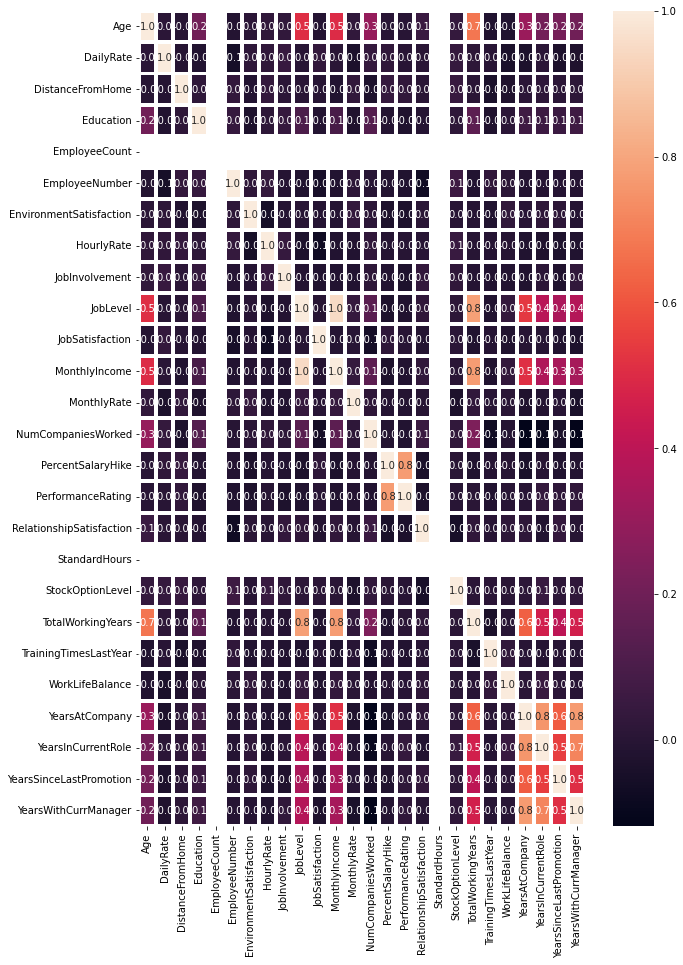

In [21]:
fig=plt.subplots(figsize=(10,15))
sns.heatmap(df.corr(),annot=True,linewidth= 3,fmt='.1f')

# **Logistic Regression**

### **Data Preprocessing**

In [22]:
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})
df['OverTime'] = df['OverTime'].map({'Yes':1, 'No':0})
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df['BusinessTravel'] = df['BusinessTravel'].map({'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2})

In [23]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [24]:
for column in df.columns:
 print('No. of values for {} is {}'.format(column, df[column].nunique()))

No. of values for Age is 43
No. of values for Attrition is 2
No. of values for BusinessTravel is 3
No. of values for DailyRate is 886
No. of values for Department is 3
No. of values for DistanceFromHome is 29
No. of values for Education is 5
No. of values for EducationField is 6
No. of values for EmployeeCount is 1
No. of values for EmployeeNumber is 1470
No. of values for EnvironmentSatisfaction is 4
No. of values for Gender is 2
No. of values for HourlyRate is 71
No. of values for JobInvolvement is 4
No. of values for JobLevel is 5
No. of values for JobRole is 9
No. of values for JobSatisfaction is 4
No. of values for MaritalStatus is 3
No. of values for MonthlyIncome is 1349
No. of values for MonthlyRate is 1427
No. of values for NumCompaniesWorked is 10
No. of values for Over18 is 1
No. of values for OverTime is 2
No. of values for PercentSalaryHike is 15
No. of values for PerformanceRating is 2
No. of values for RelationshipSatisfaction is 4
No. of values for StandardHours is 1
No

As is seen in the output above, the value of EmployeeCount, Over18, StandardHours is 1, and EmployeeNumber is 1470, we can remove these column
in the DataFrame as they do not seem to affect the attrition rate.

In [25]:
data = df.drop(['EmployeeCount', 'EmployeeNumber','Over18','StandardHours'], axis = 1)

In [26]:
np.corrcoef(data['DailyRate'],data['HourlyRate'])

array([[1.        , 0.02338142],
       [0.02338142, 1.        ]])

In [27]:
np.corrcoef(data['DailyRate'],data['MonthlyRate'])

array([[ 1.       , -0.0321816],
       [-0.0321816,  1.       ]])

In [28]:
np.corrcoef(data['MonthlyIncome'],data['MonthlyRate'])

array([[1.        , 0.03481363],
       [0.03481363, 1.        ]])

In [29]:
np.corrcoef(data['MonthlyRate'],data['PercentSalaryHike'])

array([[ 1.        , -0.00642935],
       [-0.00642935,  1.        ]])

In [30]:
np.corrcoef(data['MonthlyIncome'],data['JobLevel'])

array([[1.        , 0.95029991],
       [0.95029991, 1.        ]])

Though seems weird, there is weak correation between several salary-related variables. Job level have strong correation with monthly income

**Dummy variables**

In [32]:
data_dummies=pd.get_dummies(data)
data_dummies.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufact

**Train-test split**

In [33]:
X = data_dummies.loc[:,data_dummies.columns!='Attrition']
y = data_dummies['Attrition']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Standardization**

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

**Balancing data**

In [35]:
from imblearn.over_sampling import SMOTE
columns = X_train.columns
os = SMOTE(random_state=0)
os_data_X,os_data_y=os.fit_resample(X_train_std, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['Attrition'])
print("length of oversampled data:",len(os_data_X))
print("Number of current employees in oversampled data:",len(os_data_y[os_data_y['Attrition']==0]))
print("Number of former employees in oversampled data:",len(os_data_y[os_data_y['Attrition']==1]))
print("Proportion of current employees in oversampled data:",len(os_data_y[os_data_y['Attrition']==0])/len(os_data_X))
print("Proportion of former employees in oversampled data:",len(os_data_y[os_data_y['Attrition']==1])/len(os_data_X))

length of oversampled data: 1724
Number of current employees in oversampled data: 862
Number of former employees in oversampled data: 862
Proportion of current employees in oversampled data: 0.5
Proportion of former employees in oversampled data: 0.5


**Model fitting**

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier 1 on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier 1 on test set: 0.84


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [37]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[371   0]
 [ 69   1]]


Text(0.5, 257.44, 'Predicted label')

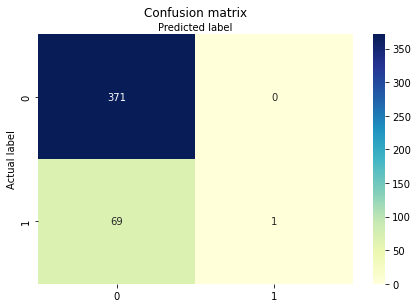

In [38]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The above model uses train data before standardization and balancing. The test accuracy reaches 84%; however, it is achieved by predicting almost
all test data as negative (attrition=0).

In [39]:
logreg2 = LogisticRegression()
logreg2.fit(os_data_X, os_data_y)
y_pred2 = logreg2.predict(X_test_std)
print('Accuracy of logistic regression classifier 2 on test set: {:.2f}'.format(logreg2.score(X_test_std, y_test)))

Accuracy of logistic regression classifier 2 on test set: 0.79


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [41]:
print(confusion_matrix(y_test,y_pred2))

[[295  76]
 [ 15  55]]


The above model uses standardized and balanced data. While the accurary rate is relatively lower, it has a better performance in predicting positive
sample.

## **Model evaluation**

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       1.00      0.01      0.03        70

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.47       441
weighted avg       0.87      0.84      0.77       441



In [43]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       371
           1       0.42      0.79      0.55        70

    accuracy                           0.79       441
   macro avg       0.69      0.79      0.71       441
weighted avg       0.87      0.79      0.82       441



In [44]:
os_data_X.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Directo

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



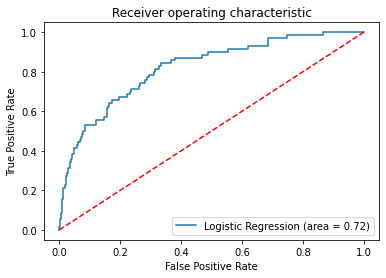

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test_std))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_std)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# **Decision Tree Classifier**


In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt=DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)
X = data_dummies.loc[:,data_dummies.columns!='Attrition']
y = data_dummies['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [49]:
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[350  21]
 [ 43  27]]


In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       371
           1       0.56      0.39      0.46        70

    accuracy                           0.85       441
   macro avg       0.73      0.66      0.69       441
weighted avg       0.84      0.85      0.84       441



In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc_dt = accuracy_score(y_test,y_pred)
f1_dt = f1_score(y_test,y_pred)

Text(0.5, 257.44, 'Predicted label')

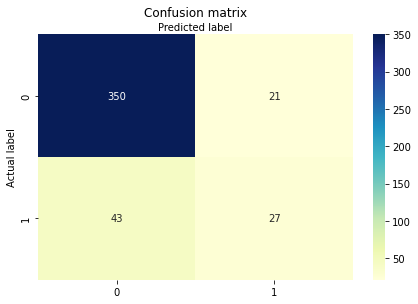

In [52]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

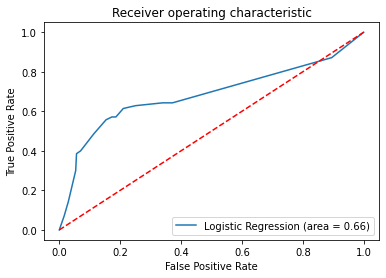

In [53]:
dt_roc_auc = roc_auc_score(y_test, dt.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Text(0, 0.5, 'Features')

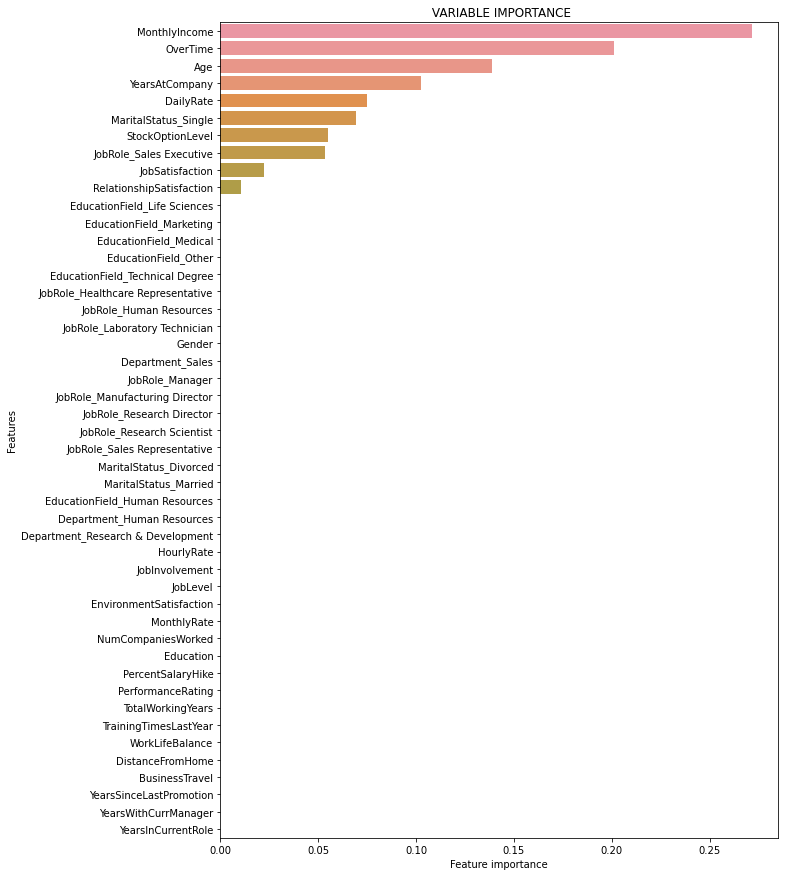

In [54]:
importances = dt.feature_importances_
feature_imp = np.array(importances)
feature_names= np.array(X_train.columns)
data={'feature_names':feature_names,'feature_importance':feature_imp}
table = pd.DataFrame(data)
table.sort_values(by=['feature_importance'], ascending=False,inplace=True)
plt.figure(figsize=(10,15))
sns.barplot(x=table['feature_importance'], y=table['feature_names'])
plt.title(' VARIABLE IMPORTANCE')
plt.xlabel('Feature importance')
plt.ylabel('Features')

# **Random Forest Classifier**

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=30,criterion='gini',random_state=0,max_depth=10)

In [56]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [57]:
columns = X_train.columns
os = SMOTE(random_state=0)
os_data_X,os_data_y=os.fit_resample(X_train_std, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['Attrition'])

In [58]:
rfc.fit(os_data_X, os_data_y)

<ipython-input-58-e7acdba7d838>:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(max_depth=10, n_estimators=30, random_state=0)

In [59]:
y_pred = rfc.predict(X_test_std)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [60]:
print(confusion_matrix(y_test,y_pred))

[[359  12]
 [ 42  28]]


In [61]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       371
           1       0.70      0.40      0.51        70

    accuracy                           0.88       441
   macro avg       0.80      0.68      0.72       441
weighted avg       0.86      0.88      0.86       441



In [62]:
acc_rfc = accuracy_score(y_test,y_pred)
f1_rfc = f1_score(y_test,y_pred)

Text(0.5, 257.44, 'Predicted label')

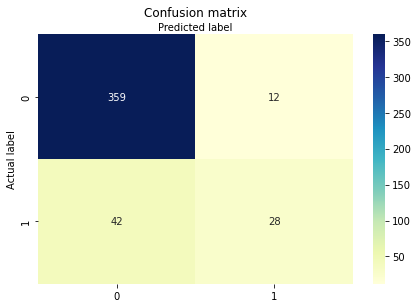

In [63]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



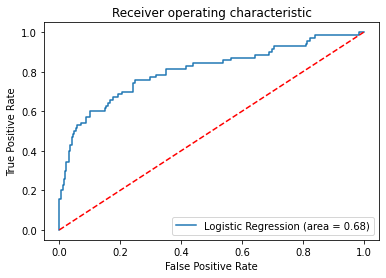

In [64]:
rfc_roc_auc = roc_auc_score(y_test, rfc.predict(X_test_std))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test_std)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('rf_ROC')
plt.show()

Text(0, 0.5, 'Features')

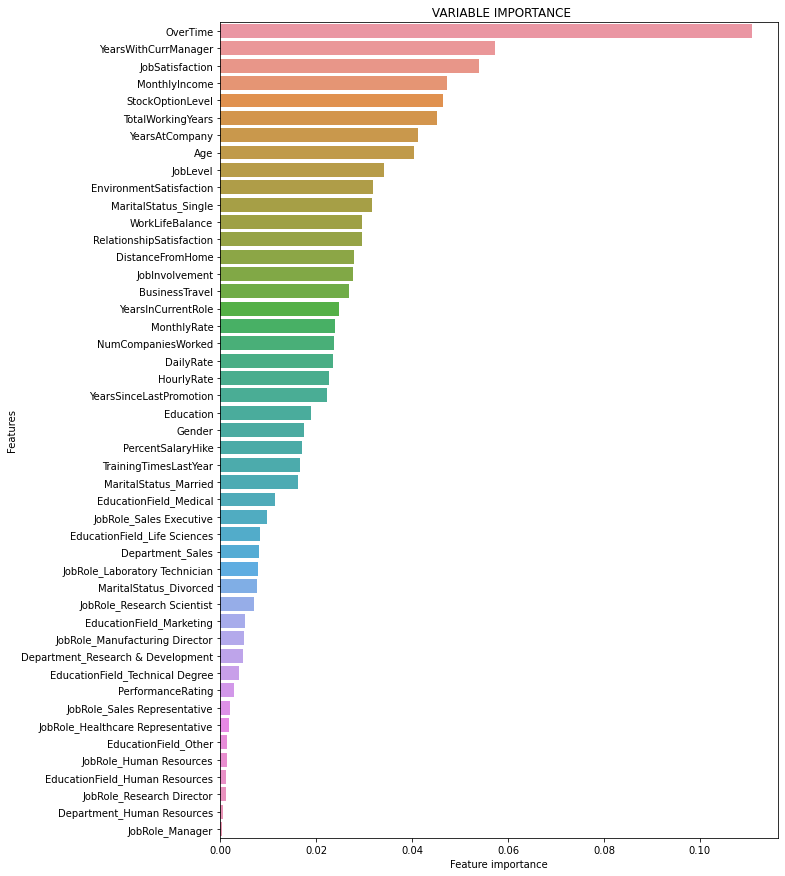

In [65]:
importances = rfc.feature_importances_
feature_imp = np.array(importances)
feature_names= np.array(X_train.columns)
data={'feature_names':feature_names,'feature_importance':feature_imp}
table = pd.DataFrame(data)
table.sort_values(by=['feature_importance'], ascending=False,inplace=True)
plt.figure(figsize=(10,15))
sns.barplot(x=table['feature_importance'], y=table['feature_names'])
plt.title(' VARIABLE IMPORTANCE')
plt.xlabel('Feature importance')
plt.ylabel('Features')

In [67]:
# models = pd.DataFrame({
#  'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier'],
#  'Accuracy' : [acc_logreg,acc_dt,acc_rfc],
#  'F-score': [f1_logreg,f1_dt,f1_rfc],
#  'AUC': [logit_roc_auc,dt_roc_auc,rfc_roc_auc]
#  })
# models.sort_values(by = 'Accuracy', ascending = False)